##### **Mit term project on ECG Signal

# ECG Signal Introduction:- 
Question 3
ECG Signal:- 
The electrical functionality of various organs in the human body is expressed by bioelectrical signals. Amongst all other bioelectrical signals ECG is an important one. The properties and performance of the human heart is reflected by it. ECG conveys important hidden information in the structure of the human heart [1]. Extraction of this information is done before its useful interpretation and analyses. These extractions of ECG signal information are helpful in identifying and explaining different pathological conditions. Then the ECG is visually analyses on screen or paper to extract the features. To make analysis the time duration of signals plays a very important role, which is why manual analysis of ECG signals is a time consuming process. Manual analysis is accompanied by errors. Hence, to extract significant information ECG signal processing has become a crucial tool, thereby minimizing the subjectivisms of manual analysis. 
ECG forms the follwoing signal[3]:-
PR Interval: Atrioventricular conduction time. The interval measured where P wave start and untill the beginning of                QRS complex
QRS Complex: Ventricular Depolarization.It measured from end of the PR interval and till end of S wave.
QT Interval: Ventricular activity (It do depolarization and repolarization).It measured from beginning of QRS complex              to the end of S wave.
ST Interval: Early part of ventricular repolarization.It starting from the end of QRS complex and till starting of T.

1  P wave is the first wave of ECG signal. It indicate that artia are contracting and pumping blood into ventricles.
2  QRS complex in which a downward deflection(Q), large upward deflection(R peak) and again downward wave(S).It          represent vemtricular depolarization.
3  T wave is the modest upward waveform that represent the  ventricular reploarization.




Question 4:- Now we plot our ECG signal.

the lenth of the signal array is:43081


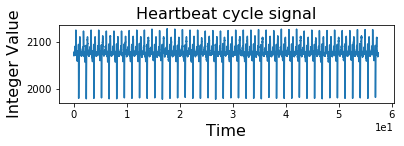

In [196]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from __future__ import division

#we use a simple open command for the file (basic Python)
f = open('aami3a.dat','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print("the lenth of the signal array is:" + str(len(AllSignal)))
#now we analysis the array for a time of 1/750 step for a total of 43081 samples, i used from_future_import division to avoid putting point after the number
x=np.arange(0,43081/750,1/750) #start,stop,step 
plt.subplot(211)
plt.plot(x,AllSignal[:43081])
plt.title('Heartbeat cycle signal',fontsize=16)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Integer Value',fontsize=16)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplots_adjust(wspace=0.9, hspace=0.8)


Question 5:-
Answer:-
There are many method to calculate samples that we can plot in 5 beats.
One method is :--- In above sample we plotted 43081 signal and their are 40 heartbeats in whole signal. When you divided 43081/40=1077 samples per beat.Now we want to plot samples for  5 beats, So we can Multiple 1077 to 5=5385 and we get our samples that we need to plot 5 beats.

Secound method is :- Supoose there are 85 beats in 60 secound=85/60=1.41
             and we need samples for 5 beats than 1.41x5=7.0833 Secound
             And we have Sampling time is 1/750 Hz=1.33 ms~0.00133
             So 7.0833/0.001333=5325.81~ 5385



Question 6:-

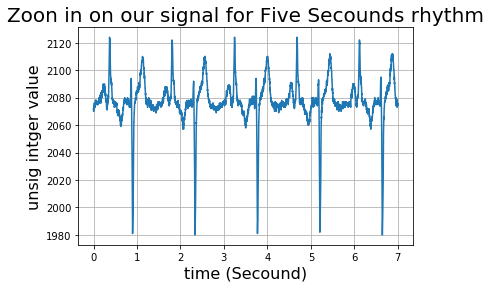

In [131]:
#Now we are ploting 5385 samples from our ECG files
x=np.arange(0,5385/750,1/750)
#now we zoom in on five secounds
inx=np.where(x>7)
inx=inx[0]
plt.plot(x[:inx[0]],AllSignal[:inx[0]])
plt.title('Zoon in on our signal for Five Secounds rhythm',fontsize=20)
plt.xlabel('time (Secound)',fontsize=16)
plt.ylabel('unsig intger value',fontsize=16)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid()

We can also plot one heartbeat using the same samples and get more knowledge about the behaviour of heart.

Maximum peak in our signal is  2124


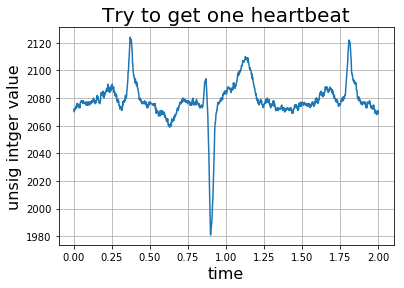

In [157]:
#now we plot our one heart Cycle
x=np.arange(0,5385/750,1/750)
inx=np.where(x>2)
inx=inx[0]
plt.plot(x[:inx[0]],AllSignal[:inx[0]])
plt.title('Try to get one heartbeat',fontsize=20)
plt.xlabel('time',fontsize=16)
plt.ylabel('unsig intger value',fontsize=16)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid()
y=np.amax(AllSignal[:720])
print ('Maximum peak in our signal is  ' +str (y))

Question 7:--
Answer- Here PR interval is smaller than the QT interval; so we can say heart rate is lower here. We can also analyse it with using the program when we have are finding heartbeat of the individual one.And using that value we can find out the heart rate is lower or not. But in this case it's lower. 

Question 8
Answer:- To calculate the heart beat of individual one, One easy method is we can us block to block method to calculate the heart rate.We need to findout the duration between R-R. So we take this duration and divide it to 60.
rate=60\R-R interval. This method is called as large block method.[6]
But i am also tried program to calculate heart rate of individual one. Using maximum peak of our signal or maximum peak of QRS complex is.

In [194]:
x=np.arange(43081)   #our total sampled signal is 43081
i=0
for index in x:
    if AllSignal[index]>=2124:   # 2124 is maximum peak in our signal is 
        i=i+1
print('Heartbeat in one minute is ' +str(i))

Heartbeat in one minute is 51


Question 9:--
DFT
$$ A_k=\sum_{m=0}^{n-1}a_m \exp \left(-2\pi i \frac{mk}{n} \right ) [k=0,...,n-1] $$

If we notice the signal has a dc component (not centered in zero) so unless we want to have a spectrum with a large value of dc or zero frequency we will first remove the dc component (by substracting the mean of the data).
We will then obtain the DFT.

Maximum peak in DFT  is  4.98176674504
DFT of our signal is


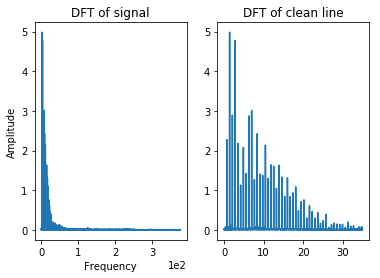

In [192]:
    Line=AllSignal[:43081]
    #we first eliminate dc signal from our sampled signal
    dataF=Line-np.mean(Line)
    L=len(dataF) 
    #the frequencies after fft will be between 0 and 1/2 of the sampling frequency
    f=np.arange(0,750/2,750/43080) #start,stop,step 
    Y=np.fft.fft(dataF)
    Pyy=abs(Y)/L
    z=max(Pyy)
    print "Maximum peak in DFT  is  " + str(z)
    #note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
    plt.subplot(121)
    plt.plot(f, Pyy[:21540])
    plt.title('DFT of signal')
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    print("DFT of our signal is")
    #now we Zoom our signal and see what we have there 
    ind=np.where(f>35)
    ind=ind[0]
    plt.subplot(122)
    plt.plot(f[:ind[0]], Pyy[:ind[0]])
    plt.title('DFT of clean line')


In [ ]:
Question 10,11:- Obtain the maxiamum frequency.

Answer 10:Maximum peak frequency in HZ: 4.98176674504
maximum aplitude of the fequency is :1.375
Answer 11:The Heartbeats for given signal in BPM : 43.6363636364


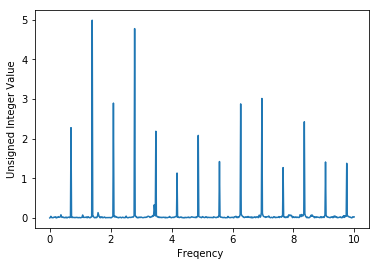

In [195]:
ind=np.where(f>10)
ind=ind[0]
f=np.arange(0,750/2,750/43080) #start,stop,step 
Y=np.fft.fft(dataF)
Pyy=abs(Y)/L
z=max(Pyy)
peak=np.amax(Pyy)
plt.xlabel('Freqency ')
plt.ylabel('Unsigned Integer Value')
plt.plot(f[:ind[0]], Pyy[:ind[0]]) 
print('Answer 10:Maximum peak frequency in HZ: ' + str(peak))
# my maximum peak is 4.98 Hz and it ocurs between 0 to 1.4 sec.
#  so my step size(43081/750)*1.4 =80.416, For loop i will take (0,80)  
x=0
i=0
for i in range (0,80):
    if (Pyy[x]) > peak:
        x=i
s=((750)/43081)*i
mfreq=str(round(step,3))
print('maximum aplitude of the fequency is :'+str(mfreq))

#Question 11 Calculate heartbeat of the given signal in beats/minutes.
Heartbeat = 60/1.375
print('Answer 11:The Heartbeats for given signal in BPM : '+ str(Heartbeat))



Answer 12
Calculation for the heart rate in beats/minute
Heartbeat = 60/1.375=43.63      (60/max frequency)

From our graph peak value of amplitude help to obtain maximum frequency they provide information about the peak value of waves.The maxiamum amlitude that show the fequency at higher peak is 4.98 Hz. And maximum amplitude of the frequency is 1.375.So other signal that is less that 3 hz are noise they can be remove by low pass filter.The first amplitude that is have 0.7 frquency so you can divide 60/0.7 and you will get your value of heartbeat per minute.


Answer 13
[7]Using filter in ECG like high pass and low passs filtering give us distoration after filtering the input signal.This type of distoration is in amplitude. Filter in ECG are mointer the real time data, So having a distoration in our signal will create problem in our data.In filtering we have non-linear and linear.If we used low-pass filter on ECG to remove high frquency muscle artifact and external interference.They mainly attunate the only of amplitude of higher frequency in ECG eqipment.Analog low pass filtering have significant effect on QRS complex but do not alter reploarization signals.Wheres High pass filter used to remove low frequency. But in Analog high frequency filter don't put so much noise in our signal as comparison to analog low pass filter.If order of the filter is higher, So greater is the distoration as type of filter.So, Reduction or any changes in amplitude doesn't make a diffcult situation for us.[7]

if we filter our signal,it won't make much difference in filtered signal,using butterworth filter make all the information visible to us like interval and amlitude of ECG signal.


Question 14,15:- Buttterworth filter with order 4 at cutoff frequency is 100 Hz and frquency response of the filter.
butterworth filter give us a smooth filtered signal. [10]

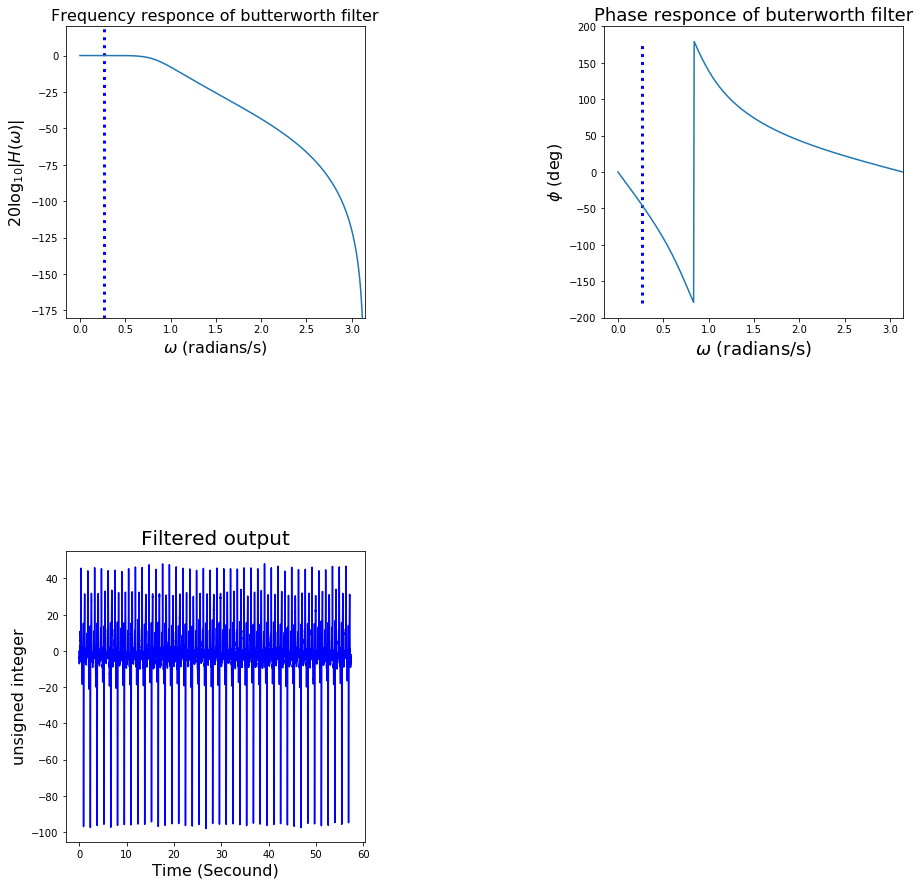

In [118]:
%matplotlib inline
from matplotlib import gridspec
from scipy import signal
from __future__ import division
 #[10] biblography
fig=plt.figure()
fig.set_size_inches((15,15))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.8, hspace=0.8)

#Now we have sampling frequency,Nyquist Frequency and cutoff frequency
cutoff= 100
Sfreq=750 
Nfreq=Sfreq/2 
low=100/Nfreq

#now we define our filter
b,a=signal.butter(4,low,btype='low',analog= False)
w,h=signal.freqz(b,a)


#now we plot frequency plot of 4th order butterworth filter
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency responce of butterworth filter',fontsize=20)
ax.plot(w, 20 * np.log10(abs(h))) 
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=16)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=20)
ax.vlines(Wn,-180,180,linestyles=':',color='b',lw=3.)

#now we plot phase plot of 4th order butterworth filter
ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase responce of buterworth filter',fontsize=20)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=16)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-200,ymax=200)
ax.vlines(Wn,-180,180,linestyles=':',color='b',lw=3.)

#output of our signal after applying the filter

ax = fig.add_subplot(plt.subplot(gs[1,0]))
sig=signal.lfilter(b,a,dataF) #output signal
x=np.arange(0,43081/750,1/750)
ax.plot(x,sig,'b')
ax.set_title('Filtered output',fontsize=20)
ax.set_xlabel('Time (Secound)',fontsize=16)
ax.set_ylabel('unsigned integer',fontsize=16)




Question 16:- Plot DFT of the filtered signal and Full specturm of the signal; 
We can plot the impluse response of our given signal and than calulate the differnce inbetween the signal before the filter and after the filter.

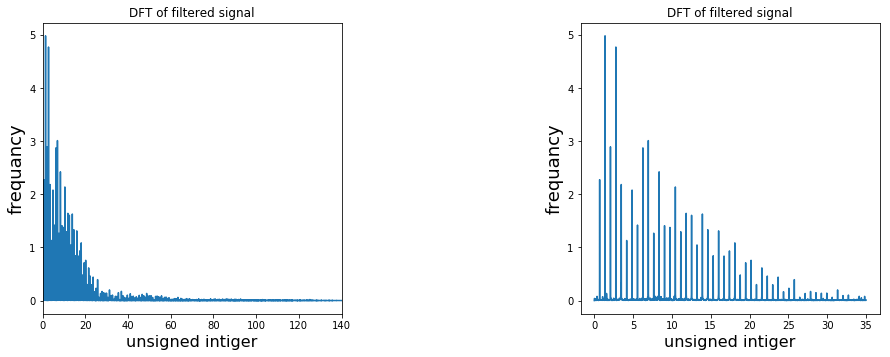

In [197]:
%matplotlib inline

fig=plt.figure()
fig.set_size_inches((15,15))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.8, hspace=0.8)

l=len(sig)
f=np.arange(0,750,750/43080)
Y=np.fft.fft(sig)
Pyy=abs(Y)/l
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(f, Pyy[:43080])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("frequancy",fontsize=18)
ax.set_xlabel('unsigned intiger',fontsize=16)
ax.set_xlim(xmax = 140, xmin =0)
#now we zoom our our filtered signal
ind=np.where(f>35)
ind=ind[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(f[:ind[0]], Pyy[:ind[0]])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("frequancy",fontsize=18)
ax.set_xlabel('unsigned intiger',fontsize=16)


Answer 17:--
Butterworth filter provide maximally flat response as comparison to other filter.Using butterworth is very easy to calculate and plot the frequency response of signal. It provide a zero attenauation near the cut-off frequency. As the order increase it work more perfectly.[8,7]
So my output of butterworth filter most of our signal is flat and it can be more perfect if we can increase the it's order. But we increase the order only a limit number.If we compare our DFT filtered signal with normal ECG signal; it's very hard to see any changes in signal after removal of noise. So; their is not that much impact of filter on our signal.But the magnitude of butterworth filter will dcrease with increment in frquency.[9]


Biblogrpahy:-
[1]	T. K. Abishek, S. Hariharan, and M. V Ramesh, “Signal Processing Algorithm for Wireless ECG Monitoring Systems.”
[2]	S. M, Learn ECG in a Day: A Systematic Approach. 2013.
[3]	“EKG Waveform | Lessons | Drills.” [Online]. Available: https://ekg.academy/ekg-waveform-lesson. [Accessed: 04-Oct-2017].
[4]  Afonoso,VX,Thompkins,W.J, Nguyen: ECG beat detection using the filter breaks.
          IEEE Trans. Bionmed ENG 46(2),192-202(1999)
[5]  Ahmend, N., Milne, P.I: Electrocardiographic data compression via orthogonal transform
           IEEE Trans. Biomed Eng. BME-22,484-487(1975)
[6] https://www.ecgmedicaltraining.com/large-block-method-to-calculate-heart-rate/
[7] Removal of high frequency noise from ECG signal using digital IIR butterworth filter by Kaustubh Gaikwad,Mahesh       Chavan.
[8] Digital filtering of the e.c.g.--a comparison of low-pass digital filters on a small computer by Taylor TP,           Macfarlane PW.
[9] Filtering techniques for signal processing by Seema Nayak,Dr. M. K. Soni,Dr. Dipali Bansal.
[10] https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html